In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
train.head()

,NUMBER,DRIVER_NUMBER,LAP_NUMBER,LAP_TIME,LAP_IMPROVEMENT,CROSSING_FINISH_LINE_IN_PIT,S1,S1_IMPROVEMENT,S2,S2_IMPROVEMENT,...,S1_LARGE,S2_LARGE,S3_LARGE,DRIVER_NAME,PIT_TIME,GROUP,TEAM,POWER,LOCATION,EVENT
0,10,1,1,92,0,NaN,05:43.3,0,35.427,0,...,05:43.3,00:35.4,00:43.3,SB,05:14.7,NaN,JR,NaN,Location 2,Free Practice 2
1,10,1,2,87,2,NaN,25.674,2,33.399,2,...,00:25.7,00:33.4,00:41.9,SB,NaN,NaN,JR,NaN,Location 2,Free Practice 2
2,10,1,3,73,0,B,28.129,0,34.091,0,...,00:28.1,00:34.1,00:57.2,SB,NaN,NaN,JR,NaN,Location 2,Free Practice 2
3,11,1,1,73,0,NaN,01:05.0,0,38.416,0,...,01:05.0,00:38.4,00:56.8,LGRA,00:33.0,NaN,AD,NaN,Location 2,Free Practice 2
4,11,1,2,73,0,NaN,28.013,0,36.743,0,...,00:28.0,00:36.7,00:44.7,LGRA,NaN,NaN,AD,NaN,Location 2,Free Practice 2


In [3]:
train.shape

(10276, 25)

In [4]:
train.duplicated().sum()

0

In [5]:
train.isnull().sum()

NUMBER                             0
 DRIVER_NUMBER                     0
 LAP_NUMBER                        0
LAP_TIME                           0
 LAP_IMPROVEMENT                   0
 CROSSING_FINISH_LINE_IN_PIT    9042
 S1                                4
 S1_IMPROVEMENT                    0
 S2                                8
 S2_IMPROVEMENT                    0
 S3                               34
 S3_IMPROVEMENT                    0
 KPH                              30
 ELAPSED                           0
 HOUR                              0
S1_LARGE                           4
S2_LARGE                           8
S3_LARGE                          34
DRIVER_NAME                        0
PIT_TIME                        8378
GROUP                           9768
TEAM                               0
POWER                           7373
LOCATION                           0
EVENT                              0
dtype: int64

In [6]:
train_weather = pd.read_csv('train_weather.csv')
train_weather.head()

,TIME_UTC_SECONDS,TIME_UTC_STR,AIR_TEMP,TRACK_TEMP,HUMIDITY,PRESSURE,WIND_SPEED,WIND_DIRECTION,RAIN,LOCATION,EVENT
0,1618042506,10/04/21 8:15,15,18.4,60,1018.05,2.12187,165,-1,Location 2,Free Practice 2
1,1618042567,10/04/21 8:16,15.0556,18.4,60,1018.12,1.06093,177,-1,Location 2,Free Practice 2
2,1618042632,10/04/21 8:17,15.0556,18.5,60,1018.12,2.12187,157,-1,Location 2,Free Practice 2
3,1618042697,10/04/21 8:18,15.0556,18.5,60,1018.08,2.12187,163,-1,Location 2,Free Practice 2
4,1618042762,10/04/21 8:19,15.1111,18.5,60,1018.15,3.1828,149,-1,Location 2,Free Practice 2


In [7]:
train_weather.shape

(914, 11)

In [8]:
train_weather.isnull().sum()

TIME_UTC_SECONDS    0
TIME_UTC_STR        0
AIR_TEMP            0
TRACK_TEMP          0
HUMIDITY            0
PRESSURE            0
WIND_SPEED          0
WIND_DIRECTION      0
RAIN                0
LOCATION            0
EVENT               0
dtype: int64

In [9]:
test = pd.read_csv('test.csv')
test.head()

,NUMBER,DRIVER_NUMBER,LAP_NUMBER,LAP_TIME,LAP_IMPROVEMENT,CROSSING_FINISH_LINE_IN_PIT,S1,S1_IMPROVEMENT,S2,S2_IMPROVEMENT,...,S1_LARGE,S2_LARGE,S3_LARGE,DRIVER_NAME,PIT_TIME,GROUP,TEAM,POWER,LOCATION,EVENT
0,10,1,1,NaN,0,NaN,01:10.2,0,35.433,0,...,01:10.2,00:35.4,00:30.7,SB,00:47.0,1.0,JR,NaN,Location 7,Qualifying Group 1
1,10,1,2,NaN,0,NaN,27.667,0,33.68,0,...,00:27.7,00:33.7,00:37.8,SB,NaN,1.0,JR,250.0,Location 7,Qualifying Group 1
2,10,1,3,NaN,2,NaN,24.688,2,29.309,2,...,00:24.7,00:29.3,00:27.1,SB,NaN,1.0,JR,250.0,Location 7,Qualifying Group 1
3,13,1,1,NaN,0,NaN,01:09.1,0,35.705,0,...,01:09.1,00:35.7,00:30.5,ACO,00:44.7,1.0,DSo,NaN,Location 7,Qualifying Group 1
4,13,1,2,NaN,0,NaN,28.401,0,33.693,0,...,00:28.4,00:33.7,00:36.0,ACO,NaN,1.0,DSo,250.0,Location 7,Qualifying Group 1


In [10]:
test.shape

(420, 25)

In [11]:
test = test.drop('LAP_TIME', axis = 1)

In [12]:
test.isnull().sum()

NUMBER                            0
 DRIVER_NUMBER                    0
 LAP_NUMBER                       0
 LAP_IMPROVEMENT                  0
 CROSSING_FINISH_LINE_IN_PIT    404
 S1                               0
 S1_IMPROVEMENT                   0
 S2                               0
 S2_IMPROVEMENT                   0
 S3                               2
 S3_IMPROVEMENT                   0
 KPH                              2
 ELAPSED                          0
 HOUR                             0
S1_LARGE                          0
S2_LARGE                          0
S3_LARGE                          2
DRIVER_NAME                       0
PIT_TIME                        265
GROUP                            29
TEAM                              0
POWER                           111
LOCATION                          0
EVENT                             0
dtype: int64

In [13]:
test_weather = pd.read_csv('test_weather.csv')
test_weather.head()

,TIME_UTC_SECONDS,TIME_UTC_STR,AIR_TEMP,TRACK_TEMP,HUMIDITY,PRESSURE,WIND_SPEED,WIND_DIRECTION,RAIN,LOCATION,EVENTS
0,1628920823,14/08/21 6:00,"20,35","25,4","63,94","1016,46","1,18",203,0,Location 8,Free Practice 2
1,1628920883,14/08/21 6:01,"20,33","25,4","63,96","1016,48","10,83",204,0,Location 8,Free Practice 2
2,1628920943,14/08/21 6:02,"20,25","25,4","64,04","1016,48","12,53",201,0,Location 8,Free Practice 2
3,1628921003,14/08/21 6:03,"20,24","25,3","64,22","1016,49","2,28",198,0,Location 8,Free Practice 2
4,1628921063,14/08/21 6:04,"20,27","25,1","64,14","1016,5","11,28",204,0,Location 8,Free Practice 2


In [14]:
test_weather.shape

(167, 11)

In [15]:
test_weather.isnull().sum()

TIME_UTC_SECONDS    0
TIME_UTC_STR        0
AIR_TEMP            0
TRACK_TEMP          0
HUMIDITY            0
PRESSURE            0
WIND_SPEED          0
WIND_DIRECTION      0
RAIN                0
LOCATION            0
EVENTS              0
dtype: int64

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10276 entries, 0 to 10275
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   NUMBER                        10276 non-null  int64  
 1    DRIVER_NUMBER                10276 non-null  int64  
 2    LAP_NUMBER                   10276 non-null  int64  
 3   LAP_TIME                      10276 non-null  int64  
 4    LAP_IMPROVEMENT              10276 non-null  int64  
 5    CROSSING_FINISH_LINE_IN_PIT  1234 non-null   object 
 6    S1                           10272 non-null  object 
 7    S1_IMPROVEMENT               10276 non-null  int64  
 8    S2                           10268 non-null  object 
 9    S2_IMPROVEMENT               10276 non-null  int64  
 10   S3                           10242 non-null  object 
 11   S3_IMPROVEMENT               10276 non-null  int64  
 12   KPH                          10246 non-null  float64
 13   

In [17]:
train.columns

Index(['NUMBER', ' DRIVER_NUMBER', ' LAP_NUMBER', 'LAP_TIME',
       ' LAP_IMPROVEMENT', ' CROSSING_FINISH_LINE_IN_PIT', ' S1',
       ' S1_IMPROVEMENT', ' S2', ' S2_IMPROVEMENT', ' S3', ' S3_IMPROVEMENT',
       ' KPH', ' ELAPSED', ' HOUR', 'S1_LARGE', 'S2_LARGE', 'S3_LARGE',
       'DRIVER_NAME', 'PIT_TIME', 'GROUP', 'TEAM', 'POWER', 'LOCATION',
       'EVENT'],
      dtype='object')

In [18]:
train.columns = train.columns.str.replace(' ','')
train.columns

Index(['NUMBER', 'DRIVER_NUMBER', 'LAP_NUMBER', 'LAP_TIME', 'LAP_IMPROVEMENT',
       'CROSSING_FINISH_LINE_IN_PIT', 'S1', 'S1_IMPROVEMENT', 'S2',
       'S2_IMPROVEMENT', 'S3', 'S3_IMPROVEMENT', 'KPH', 'ELAPSED', 'HOUR',
       'S1_LARGE', 'S2_LARGE', 'S3_LARGE', 'DRIVER_NAME', 'PIT_TIME', 'GROUP',
       'TEAM', 'POWER', 'LOCATION', 'EVENT'],
      dtype='object')

In [19]:
test.columns = test.columns.str.replace(' ','')
test.columns

Index(['NUMBER', 'DRIVER_NUMBER', 'LAP_NUMBER', 'LAP_IMPROVEMENT',
       'CROSSING_FINISH_LINE_IN_PIT', 'S1', 'S1_IMPROVEMENT', 'S2',
       'S2_IMPROVEMENT', 'S3', 'S3_IMPROVEMENT', 'KPH', 'ELAPSED', 'HOUR',
       'S1_LARGE', 'S2_LARGE', 'S3_LARGE', 'DRIVER_NAME', 'PIT_TIME', 'GROUP',
       'TEAM', 'POWER', 'LOCATION', 'EVENT'],
      dtype='object')

In [20]:
train.isnull().sum()

NUMBER                            0
DRIVER_NUMBER                     0
LAP_NUMBER                        0
LAP_TIME                          0
LAP_IMPROVEMENT                   0
CROSSING_FINISH_LINE_IN_PIT    9042
S1                                4
S1_IMPROVEMENT                    0
S2                                8
S2_IMPROVEMENT                    0
S3                               34
S3_IMPROVEMENT                    0
KPH                              30
ELAPSED                           0
HOUR                              0
S1_LARGE                          4
S2_LARGE                          8
S3_LARGE                         34
DRIVER_NAME                       0
PIT_TIME                       8378
GROUP                          9768
TEAM                              0
POWER                          7373
LOCATION                          0
EVENT                             0
dtype: int64

In [21]:
newtrain = train.copy()
newtest = test.copy()

In [22]:
newtrain = newtrain.drop(['CROSSING_FINISH_LINE_IN_PIT', 'PIT_TIME', 'GROUP', 'POWER'], axis = 1)
newtest = newtest.drop(['CROSSING_FINISH_LINE_IN_PIT', 'PIT_TIME', 'GROUP', 'POWER'], axis = 1)

In [23]:
print(newtrain.shape)
print(newtest.shape)

(10276, 21)
(420, 20)


In [24]:
TIME_COLUMNS = ['S1', 'S2', 'S3', 'S1_LARGE', 'S2_LARGE', 'S3_LARGE']
for i in TIME_COLUMNS:
    newtrain[i] = newtrain[i].fillna(0)
    newtest[i] = newtest[i].fillna(0)

In [25]:
def time2seconds(time):
  if type(time) != str:
    return time
  parts = [float(p) for p in time.split(':')]
  parts = [p * (60 ** i) for i, p in enumerate(reversed(parts))]
  return sum(parts)

In [26]:
TIME_COLUMNS = ['ELAPSED', 'S1', 'S2', 'S3', 'S1_LARGE', 'S2_LARGE', 'S3_LARGE', 'HOUR']

In [27]:
for i in TIME_COLUMNS:
    newtrain[i] = newtrain[i].apply(time2seconds)
    newtest[i] = newtest[i].apply(time2seconds)

In [28]:
newtrain['KPH'] = newtrain['KPH'].fillna(newtrain['KPH'].mean())
newtest['KPH'] = newtest['KPH'].fillna(newtest['KPH'].mean())

In [29]:
newtrain.isnull().sum()

NUMBER             0
DRIVER_NUMBER      0
LAP_NUMBER         0
LAP_TIME           0
LAP_IMPROVEMENT    0
S1                 0
S1_IMPROVEMENT     0
S2                 0
S2_IMPROVEMENT     0
S3                 0
S3_IMPROVEMENT     0
KPH                0
ELAPSED            0
HOUR               0
S1_LARGE           0
S2_LARGE           0
S3_LARGE           0
DRIVER_NAME        0
TEAM               0
LOCATION           0
EVENT              0
dtype: int64

In [30]:
newtest.isnull().sum()

NUMBER             0
DRIVER_NUMBER      0
LAP_NUMBER         0
LAP_IMPROVEMENT    0
S1                 0
S1_IMPROVEMENT     0
S2                 0
S2_IMPROVEMENT     0
S3                 0
S3_IMPROVEMENT     0
KPH                0
ELAPSED            0
HOUR               0
S1_LARGE           0
S2_LARGE           0
S3_LARGE           0
DRIVER_NAME        0
TEAM               0
LOCATION           0
EVENT              0
dtype: int64

In [31]:
newtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10276 entries, 0 to 10275
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   NUMBER           10276 non-null  int64  
 1   DRIVER_NUMBER    10276 non-null  int64  
 2   LAP_NUMBER       10276 non-null  int64  
 3   LAP_TIME         10276 non-null  int64  
 4   LAP_IMPROVEMENT  10276 non-null  int64  
 5   S1               10276 non-null  float64
 6   S1_IMPROVEMENT   10276 non-null  int64  
 7   S2               10276 non-null  float64
 8   S2_IMPROVEMENT   10276 non-null  int64  
 9   S3               10276 non-null  float64
 10  S3_IMPROVEMENT   10276 non-null  int64  
 11  KPH              10276 non-null  float64
 12  ELAPSED          10276 non-null  float64
 13  HOUR             10276 non-null  float64
 14  S1_LARGE         10276 non-null  float64
 15  S2_LARGE         10276 non-null  float64
 16  S3_LARGE         10276 non-null  float64
 17  DRIVER_NAME 

In [32]:
newtrain['TEAM'].value_counts()

TAG          935
MAHINDRAd    801
ME           470
DSo          457
ROK          456
NIOO         455
Ml           448
N            441
BMWE         438
ROKo         438
BMWl         435
Nt           434
NIO          433
DS¬â         426
JE           425
AD           416
AR           405
JR           400
EA           394
DRAGONo      383
EF           379
DRAGONR      213
DRAGON√É     194
Name: TEAM, dtype: int64

In [33]:
newtest['TEAM'].value_counts()

MAHINDRAd    38
TAG          37
Ml           21
BMWE         20
DS¬â         19
N            19
DRAGONR      18
JR           18
EA           17
JE           17
DSo          17
NIO          17
EF           17
ME           17
BMWl         16
AD           16
NIOO         16
DRAGONo      16
Nt           16
AR           16
ROKo         16
ROK          16
Name: TEAM, dtype: int64

In [34]:
newtest['EVENT'].value_counts()

Qualifying Group 2    113
Qualifying Group 3    110
Qualifying Group 4     99
Qualifying Group 1     98
Name: EVENT, dtype: int64

In [35]:
newtrain['EVENT'].value_counts()

Free Practice 1       4396
Free Practice 2       2981
Free Practice 3       2391
Qualifying Group 4     137
Qualifying Group 3     129
Qualifying Group 2     122
Qualifying Group 1     120
Name: EVENT, dtype: int64

In [36]:
newtrain['LOCATION'].value_counts()

Location 8    1845
Location 1    1556
Location 3    1443
Location 6    1353
Location 5    1319
Location 2    1075
Location 7     907
Location 4     778
Name: LOCATION, dtype: int64

In [37]:
newtest['LOCATION'].value_counts()

Location 6    155
Location 7    153
Location 8    112
Name: LOCATION, dtype: int64

In [38]:
newtrain['LOCATION']= newtrain['LOCATION'].apply(lambda x:x.split(' ')[1])

In [39]:
newtest['LOCATION']= newtest['LOCATION'].apply(lambda x:x.split(' ')[1])

In [40]:
newtrain['LOCATION'] = newtrain['LOCATION'].astype(int)
newtest['LOCATION'] = newtest['LOCATION'].astype(int)

In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [42]:
columns = ['TEAM', 'EVENT', 'DRIVER_NAME']
for i in columns:
    newtrain[i] = le.fit_transform(newtrain[i])
    newtest[i] = le.fit_transform(newtest[i])

In [43]:
newtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10276 entries, 0 to 10275
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   NUMBER           10276 non-null  int64  
 1   DRIVER_NUMBER    10276 non-null  int64  
 2   LAP_NUMBER       10276 non-null  int64  
 3   LAP_TIME         10276 non-null  int64  
 4   LAP_IMPROVEMENT  10276 non-null  int64  
 5   S1               10276 non-null  float64
 6   S1_IMPROVEMENT   10276 non-null  int64  
 7   S2               10276 non-null  float64
 8   S2_IMPROVEMENT   10276 non-null  int64  
 9   S3               10276 non-null  float64
 10  S3_IMPROVEMENT   10276 non-null  int64  
 11  KPH              10276 non-null  float64
 12  ELAPSED          10276 non-null  float64
 13  HOUR             10276 non-null  float64
 14  S1_LARGE         10276 non-null  float64
 15  S2_LARGE         10276 non-null  float64
 16  S3_LARGE         10276 non-null  float64
 17  DRIVER_NAME 

In [44]:
newtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   NUMBER           420 non-null    int64  
 1   DRIVER_NUMBER    420 non-null    int64  
 2   LAP_NUMBER       420 non-null    int64  
 3   LAP_IMPROVEMENT  420 non-null    int64  
 4   S1               420 non-null    float64
 5   S1_IMPROVEMENT   420 non-null    int64  
 6   S2               420 non-null    float64
 7   S2_IMPROVEMENT   420 non-null    int64  
 8   S3               420 non-null    float64
 9   S3_IMPROVEMENT   420 non-null    int64  
 10  KPH              420 non-null    float64
 11  ELAPSED          420 non-null    float64
 12  HOUR             420 non-null    float64
 13  S1_LARGE         420 non-null    float64
 14  S2_LARGE         420 non-null    float64
 15  S3_LARGE         420 non-null    float64
 16  DRIVER_NAME      420 non-null    int32  
 17  TEAM            

In [45]:
x = newtrain.drop('LAP_TIME', axis = 1)
y = newtrain['LAP_TIME']

In [46]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [47]:
from sklearn.metrics import mean_squared_log_error

In [54]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
y_pred = xgb.fit(x_train, y_train).predict(x_test)
print(np.sqrt(mean_squared_log_error(y_test, y_pred)))

0.6145579359626746


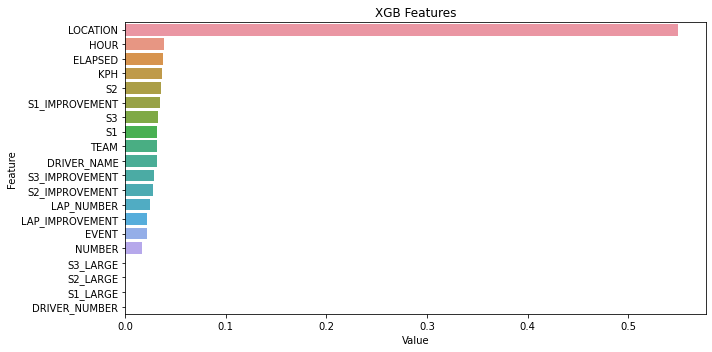

In [60]:
feature_imp = pd.DataFrame(sorted(zip(xgb.feature_importances_, x.columns), reverse=True)[:], columns=['Value','Feature'])
plt.figure(figsize=(10,5))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('XGB Features')
plt.tight_layout()
plt.show()

In [61]:
x_train = newtrain.drop('LAP_TIME', axis = 1)
y_train = newtrain['LAP_TIME']
x_test = newtest

In [62]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
y_pred = xgb.fit(x_train, y_train).predict(x_test)
solution = pd.DataFrame({'LAP_TIME': y_pred})
solution.to_csv('XGB.csv', index = False)

In [48]:
x_train = newtrain.drop(['LAP_TIME', 'S3_LARGE', 'S2_LARGE', 'S1_LARGE', 'DRIVER_NUMBER'], axis = 1)
y_train = newtrain['LAP_TIME']
x_test = newtest.drop(['S3_LARGE', 'S2_LARGE', 'S1_LARGE', 'DRIVER_NUMBER'], axis = 1)

In [49]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
y_pred = xgb.fit(x_train, y_train).predict(x_test)
solution = pd.DataFrame({'LAP_TIME': y_pred})
solution.to_csv('Solution.csv', index = False)